In [1]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv('D:\Bikram\Learn\True Data Scientist\DSMP 1.0\Pandas Case Study Streamlit App\data\startup_funding.csv')
df.head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [120]:
list(sorted(df['Startup Name'].unique()))

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [122]:
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [123]:
df.drop(columns = ['Remarks'],inplace=True)

In [124]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [125]:
df.set_index('Sr No', inplace = True)

In [126]:
df.rename(columns = {
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
}, inplace=True)

In [127]:
df.columns

Index(['date', 'startup', 'vertical', 'subvertical', 'city', 'investors',
       'round', 'amount'],
      dtype='object')

In [128]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].fillna(0)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3044 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [117]:
# df = df[df['amount'].notna() & df['amount'].str.isdigit()]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2069 non-null   object
 1   startup      2069 non-null   object
 2   vertical     1938 non-null   object
 3   subvertical  1422 non-null   object
 4   city         1934 non-null   object
 5   investors    2069 non-null   object
 6   round        2068 non-null   object
 7   amount       2069 non-null   object
dtypes: object(8)
memory usage: 145.5+ KB


In [133]:
# Step 1: Convert 'amount' column to string (handles NaN safely)
df['amount'] = df['amount'].astype(str)

# Step 2: Remove non-digit characters
df['amount_cleaned'] = df['amount'].str.replace(r'\D', '', regex=True)

# Step 3: Convert to numeric (invalid values become NaN)
df['amount_cleaned'] = pd.to_numeric(df['amount_cleaned'], errors='coerce')

# Step 4: Drop rows with NaN in the cleaned column
df = df[df['amount_cleaned'].notna()]

# Optional: Replace original 'amount' column with cleaned values
df['amount'] = df['amount_cleaned']
df.drop(columns=['amount_cleaned'], inplace=True)


In [134]:
df['amount'] = df['amount'].astype(float)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3044 non-null   object 
 1   startup      3044 non-null   object 
 2   vertical     2873 non-null   object 
 3   subvertical  2108 non-null   object 
 4   city         2864 non-null   object 
 5   investors    3044 non-null   object 
 6   round        3040 non-null   object 
 7   amount       3044 non-null   float64
dtypes: float64(1), object(7)
memory usage: 214.0+ KB


In [138]:
def to_inr(dollar):
    inr = dollar*82.5
    return inr/10000000

In [139]:
df['amount'] = df['amount'].apply(to_inr)

In [140]:
df['amount']

Sr No
1       1650.000000
2         66.399250
3        151.460595
4         24.750000
5         14.850000
           ...     
3040      37.125000
3041       6.806250
3042      12.375000
3043       0.000000
3044       1.155000
Name: amount, Length: 3044, dtype: float64

In [143]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [147]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12580\1838826657.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'],errors='coerce')


In [149]:
df['date'].dt.year

Sr No
1       2020.0
2       2020.0
3       2020.0
4       2020.0
5       2020.0
         ...  
3040    2015.0
3041    2015.0
3042    2015.0
3043    2015.0
3044    2015.0
Name: date, Length: 3044, dtype: float64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3041 non-null   datetime64[ns]
 1   startup      3044 non-null   object        
 2   vertical     2873 non-null   object        
 3   subvertical  2108 non-null   object        
 4   city         2864 non-null   object        
 5   investors    3044 non-null   object        
 6   round        3040 non-null   object        
 7   amount       3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [152]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2858 non-null   datetime64[ns]
 1   startup      2858 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2098 non-null   object        
 4   city         2858 non-null   object        
 5   investors    2858 non-null   object        
 6   round        2858 non-null   object        
 7   amount       2858 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 201.0+ KB


In [154]:
df.to_csv('startup_clean.csv',index=False)

In [160]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [161]:
df['investors']

Sr No
1                                 Tiger Global Management
2                               Susquehanna Growth Equity
3                                   Sequoia Capital India
4                                          Vinod Khatumal
5                                 Sprout Venture Partners
                              ...                        
2869                                        SAIF Partners
2870    Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...
2871                                           Rainmatter
2872                                          The HR Fund
2873             Bessemer Venture Partners, SAIF Partners
Name: investors, Length: 2858, dtype: object

In [163]:
df[df['investors'].str.contains('Sumit Jain')].head()[['date','startup','vertical','round','amount']]

,date,startup,vertical,round,amount
Sr No,,,,,
1384,2016-09-20,JoeHukum,Technology,Seed Funding,0.000
1544,2016-07-15,BaggOut,eCommerce,Seed Funding,0.000
1697,2016-12-05,Unacademy,Consumer Internet,Seed Funding,4.125
1716,2016-05-18,Parentlane,Consumer Internet,Seed Funding,0.000
2870,2015-04-29,Dazo,Mobile Food Ordering app,Seed Funding,0.000


In [168]:
df[df['investors'].str.contains('Sumit Jain')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Unacademy     4.125
BaggOut       0.000
Dazo          0.000
JoeHukum      0.000
Parentlane    0.000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

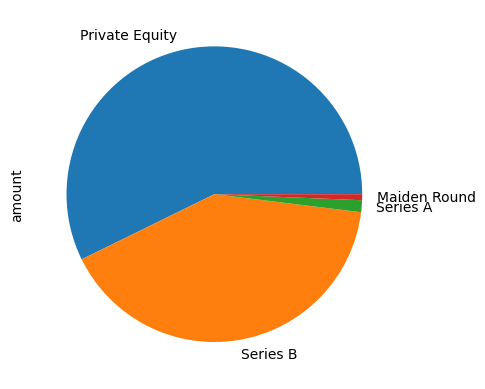

In [177]:
df[df['investors'].str.contains('Matrix Partners')].groupby('round')['amount'].sum().sort_values(ascending=False).plot(kind='pie')

In [176]:
df[df['investors'].str.contains('Matrix Partners')].groupby('')

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
30,2019-11-15,Vogo Automotive,Last Mile Transportation,Scooter sharing app,Kormangala,"Matrix Partners, Stellaris Venture Partners, K...",Series B,2334.750
36,2019-05-09,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,37.125
78,2019-03-06,Avail Finance,Finance,FinTech,Bengaluru,Matrix Partners,Series A,74.250
205,2018-07-17,Ofbusiness,Finance,Online Lending Platform For SME,Gurugram,"Creation Investments, Falcon Edge, Matrix Part...",Private Equity,239.250
224,2018-07-31,Five Star Group,Fin-Tech,Non-Bank Lending Platform For SME,Chennai,"TPG, Norwest Venture Partners, Sequoia Capital...",Private Equity,825.000
333,2018-03-14,AvailFinance,Consumer Internet,Online Lending Platform,Bengaluru,"Matrix Partners, Bhavish Aggarwal, Ankit Bhati...",Private Equity,141.900
454,2017-12-14,Transversal Technologies,Technology,Hyperlocal Video Information Sharing Platform,Bengaluru,Matrix Partners,Private Equity,49.500
482,2017-07-11,DocTalk,Technology,Doctor Patient Communication platform,Mumbai,"Matrix Partners India, Khosla Ventures",Private Equity,41.250
489,2017-09-11,Tilite Technologies Pvt. Ltd,Technology,Saas based Corporate Travel Management Solution,Bangalore,Matrix Partners,Seed Funding,0.000


<Axes: ylabel='amount'>

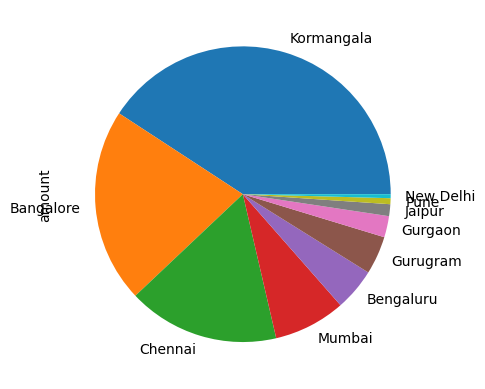

In [180]:
df[df['investors'].str.contains('Matrix Partners')].groupby('city')['amount'].sum().sort_values(ascending=False).plot(kind="pie")


In [181]:
city_series = df[df['investors'].str.contains('Matrix Partners')].groupby('city')['amount'].sum().sort_values(ascending=False)

In [182]:
city_series.index

Index(['Kormangala', 'Bangalore', 'Chennai', 'Mumbai', 'Bengaluru', 'Gurugram',
       'Gurgaon', 'Jaipur', 'Pune', 'New Delhi'],
      dtype='object', name='city')

In [185]:
df['year'] = df['date'].dt.year

Sr No
1       2020
2       2020
3       2020
4       2020
5       2020
        ... 
2869    2015
2870    2015
2871    2015
2872    2015
2873    2015
Name: date, Length: 2858, dtype: int64

<Axes: xlabel='year'>

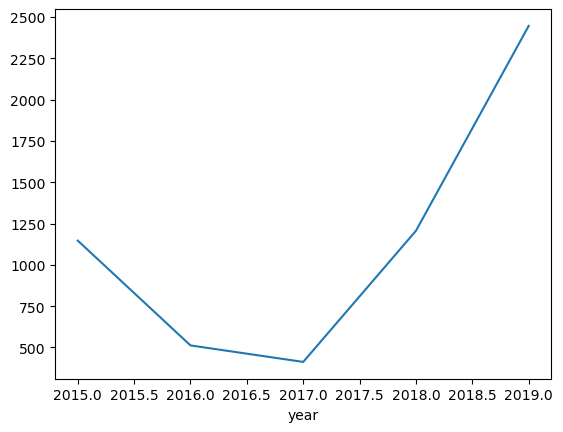

In [189]:
df[df['investors'].str.contains('Matrix Partners')].groupby('year')['amount'].sum().plot(kind='line')

In [190]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


In [197]:
df['startup'].nunique()

2327